In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn import metrics
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# Data Visualization

In [2]:
#Importing data and removing 'id'
data = pd.read_csv("stroke_dataset.csv")
data.drop('id', axis = 1, inplace = True)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   object 
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   object 
 5   work_type          5110 non-null   object 
 6   Residence_type     5110 non-null   object 
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                4909 non-null   float64
 9   smoking_status     5110 non-null   object 
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int64(3), object(5)
memory usage: 439.3+ KB


In [4]:
#Checking for missing data
data.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
print (f'{round(data["hypertension"].value_counts(normalize = True)*100,2)}')
print (f'{round(data["heart_disease"].value_counts(normalize = True)*100,2)}')
print (f'{round(data["ever_married"].value_counts(normalize = True)*100,2)}')

0    90.25
1     9.75
Name: hypertension, dtype: float64
0    94.6
1     5.4
Name: heart_disease, dtype: float64
Yes    65.62
No     34.38
Name: ever_married, dtype: float64


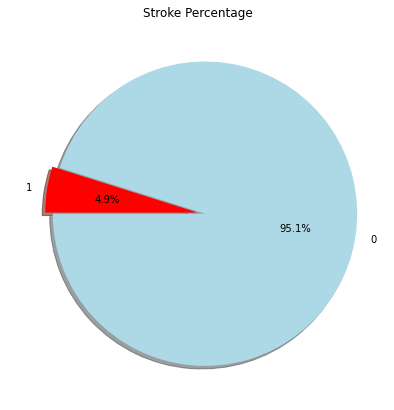

In [6]:
#labels and sizes for pie chart
labels = data['stroke'].value_counts(sort = True).index
sizes = data['stroke'].value_counts(sort = True)

colors = ["lightblue", "red"]
explode = (0.05, 0)

plt.figure(figsize = (7, 7))
plt.pie(sizes, explode = explode, labels = labels, colors = colors, autopct = '%1.1f%%',
        shadow = True, startangle = 180)

plt.title('Stroke Percentage')
plt.show()

Only 4.9% of the people in the data have a stroke

<AxesSubplot:xlabel='ever_married', ylabel='count'>

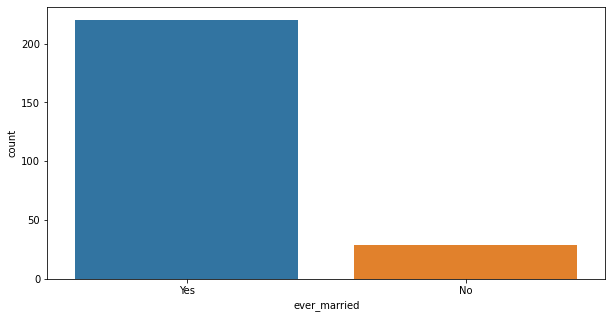

In [7]:
plt.figure(figsize = (10,5))
stroke=data.loc[data['stroke']==1]
sns.countplot(data=stroke, x='ever_married')

We can see that most of the data where they have a stroke, highly likely that they are married

# Data Cleaning

In [8]:
lab = LabelEncoder()
gender = lab.fit_transform(data['gender'])
smoking_status = lab.fit_transform(data['smoking_status'])
work_type = lab.fit_transform(data['work_type'])
Residence_type = lab.fit_transform(data['Residence_type'])
ever_married = lab.fit_transform(data['ever_married'])

data['ever_married']=ever_married
data['Residence_type']=Residence_type
data['smoking_status']=smoking_status
data['gender']=gender
data['work_type']=work_type

data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,1,67.0,0,1,1,2,1,228.69,36.6,1,1
1,0,61.0,0,0,1,3,0,202.21,NaN,2,1
2,1,80.0,0,1,1,2,0,105.92,32.5,2,1
3,0,49.0,0,0,1,2,1,171.23,34.4,3,1
4,0,79.0,1,0,1,3,0,174.12,24.0,2,1


In [9]:
data['bmi'] = data['bmi'].fillna(data['bmi'].mean())
data.isnull().sum()

gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(3), int32(5), int64(3)
memory usage: 339.5 KB


In [11]:
data['age']=data['age'].astype('int')

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   gender             5110 non-null   int32  
 1   age                5110 non-null   int32  
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   ever_married       5110 non-null   int32  
 5   work_type          5110 non-null   int32  
 6   Residence_type     5110 non-null   int32  
 7   avg_glucose_level  5110 non-null   float64
 8   bmi                5110 non-null   float64
 9   smoking_status     5110 non-null   int32  
 10  stroke             5110 non-null   int64  
dtypes: float64(2), int32(6), int64(3)
memory usage: 319.5 KB


# Spltting the dataset for classification modelling

In [13]:
#Splitting dataset
X = data.drop('stroke', axis = 1)
y = data["stroke"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, 
                                                    random_state = 100)

# XGB Classifier

In [14]:
xgb_model = XGBClassifier(eval_metric = 'logloss', use_label_encoder=False)
xgb_model.fit(X_train, y_train)
print('Accuracy of the model: {}'.format(xgb_model.score(X_test, y_test)))

Accuracy of the model: 0.9510763209393346


# Random Forest Classifier

In [15]:
randomforest = RandomForestClassifier(n_estimators = 200)
randomforest.fit(X_train, y_train)
y_pred = randomforest.predict(X_test)
print("Accuracy of the model: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of the model:  0.9540117416829745


# Logistic Regression

In [16]:
logmodel = LogisticRegression(max_iter = 1000)
logmodel.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [17]:
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[975,   1],
       [ 46,   0]], dtype=int64)

In [18]:
print("Accuracy of the model: ", metrics.accuracy_score(y_test, y_pred))

Accuracy of the model:  0.9540117416829745
